## **Annual Income Prediction**
This notebook aims to predict an individual's annual income based on various factors such as education level, age, gender, occupation, and more. The dataset includes individuals classified by income groups (income <= 50K or income > 50K) along with their respective features. We will go through the following tasks:

1.   Clean and process the data - Cleaning data, statistical, visualization and preprocessing techniques, encoding categorical variables, handling missing values, and normalization.
2.   Model Training and Evaluation - Training multiple classification models, evaluating their performance, and selecting the best one.

### **Step 1: Data Cleaning and Processing**

#### **1.1: Load the Dataset**

We begin by loading the dataset and displaying the first few rows to get an understanding of its structure.

In [1]:
import pandas as pd

# load the dataset
df = pd.read_csv("/content/adult_income.csv")

# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### **1.3: Explore Data Structure and Basic Statistics**
Inspect the dataset to understand the features and types of values it contains.

In [2]:
# Check data structure and summary statistics
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
                 age workclass        fnlwgt education  educational-num

### **Step 2: Data Cleaning**
#### **2.1: Check for Duplicates**

Duplicate rows can skew the analysis, so we check for them and remove any if found.


In [3]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 52


#### **2.2: Handle Missing Values**

Identify and replace missing values in the dataset. Here, missing values are represented by "?", so we replace them with NaN for easier processing.


In [4]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Impute missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns with the most frequent value
categorical_cols = df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K



### **Step 3: Exploratory Data Analysis**
#### **3.1: Statistical Analysis and Correlation Matrix**

Generate a correlation matrix to understand relationships between numerical features.

In [6]:
# Ensure all categorical variables are encoded to numerical values
df_encoded = pd.get_dummies(df, drop_first=True)

# Now we can calculate the correlation matrix safely
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)


                                     age    fnlwgt  educational-num  \
age                             1.000000 -0.076451         0.030635   
fnlwgt                         -0.076451  1.000000        -0.038727   
educational-num                 0.030635 -0.038727         1.000000   
capital-gain                    0.077185 -0.003715         0.125219   
capital-loss                    0.056838 -0.004378         0.080986   
...                                  ...       ...              ...   
native-country_Trinadad&Tobago  0.001041  0.004154        -0.010217   
native-country_United-States    0.012933 -0.074135         0.127395   
native-country_Vietnam         -0.012373 -0.007484        -0.007563   
native-country_Yugoslavia       0.002892  0.004700        -0.005810   
income_>50K                     0.230144 -0.006309         0.332802   

                                capital-gain  capital-loss  hours-per-week  \
age                                 0.077185      0.056838        0.0

#### **3.2: Visualize Data Distributions**
Visualize data distributions to gain insights into numerical and categorical features.


##### **3.2.1: Numerical Features**

Histograms show distributions, and boxplots help identify potential outliers in numerical features.
**bold text**

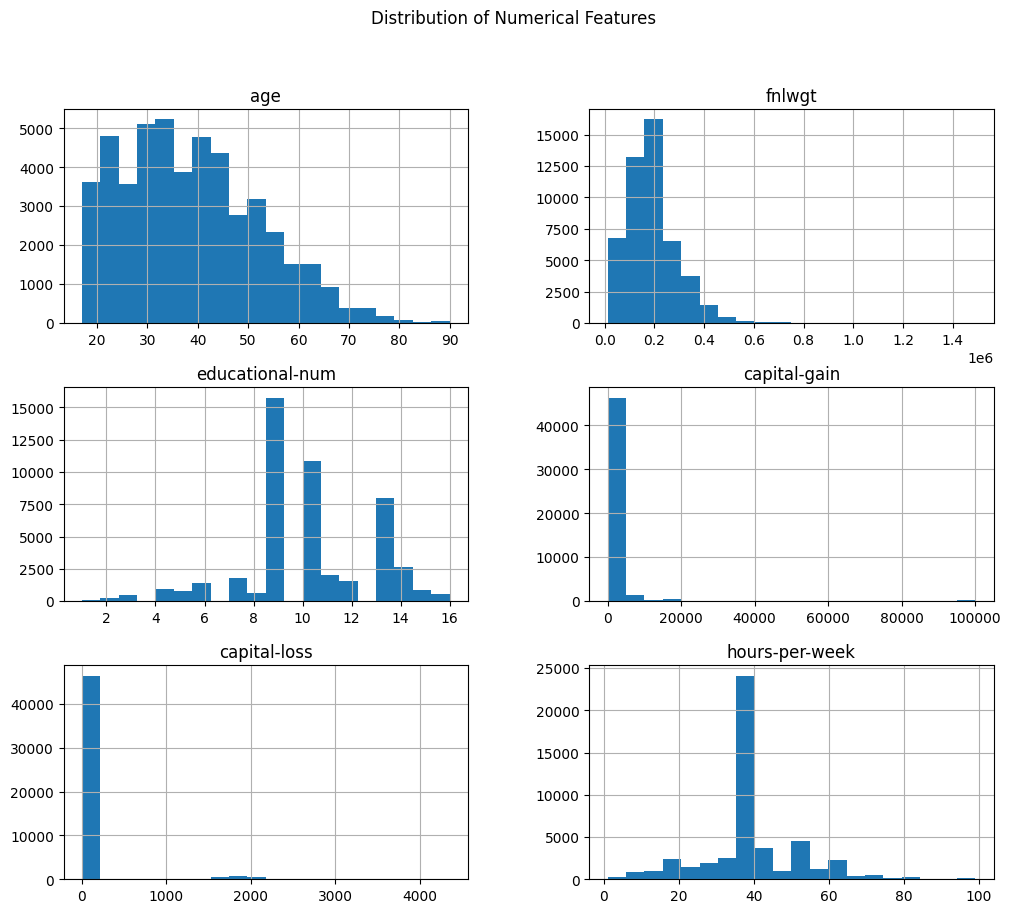

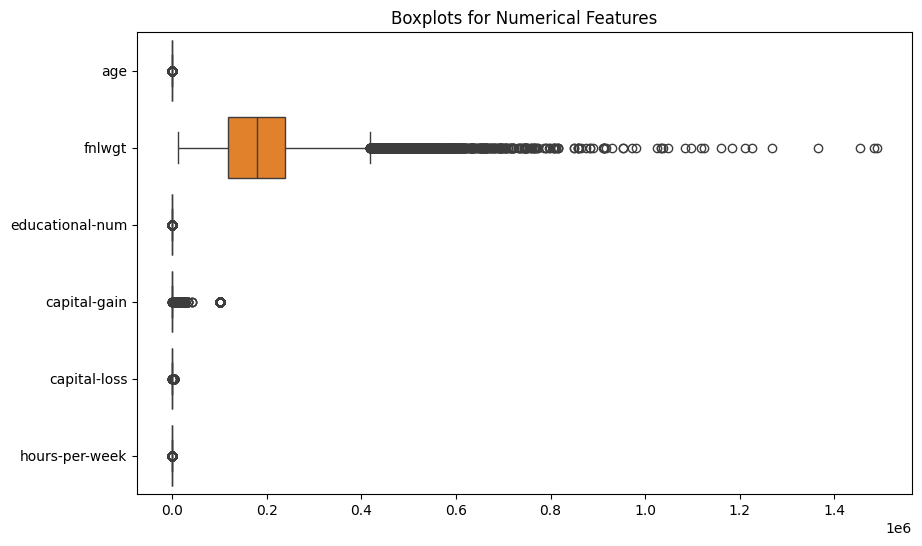

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title('Boxplots for Numerical Features')
plt.show()

##### **3.2.2: Categorical Features**
Bar plots for categorical variables help visualize the frequency distribution of each category.

In [13]:
# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=[object]).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

### **Step 4: Preprocessing**
#### **4.1: Encoding Categorical Variables**
Convert categorical variables into numeric using one-hot encoding. One-hot encoding is preferred because it prevents ordinality and allows models to interpret each category as a distinct and non-ordered variable, leading to better performance and more accurate predictions.

In [5]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

#### **4.2: 5: Data Splitting**

Separate the dataset into features and target, then split it into training and validation sets. "income_>50K" is assumed to be the target variable in the dataset, which is what I want to predict (whether someone's income is greater than 50K or not).

In [6]:
# Define features and target
X = df.drop("income_>50K", axis=1)  # Assuming "income_>50K" is the encoded target variable
y = df["income_>50K"]

# Split the data
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step 5: Choosing a Scaler and Scaling the Data**
We chose StandardScaler here because many machine learning models perform better with standardized data, especially when the data is approximately normally distributed. StandardScaler transforms features to have a mean of 0 and standard deviation of 1.


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


### **Step 6: Model Training and Evaluation**
#### **6.1: Initialize and Train Models**
We will train multiple classification models, including:

1.   Logistic Regression
2.   K-Nearest Neighbors (KNN)
3.   Support Vector Machine (SVM)
4.   Decision Tree
5.   Random Forest

#### **6.2: Evaluate Models**
Each model is evaluated using accuracy, precision, recall, and F1-score on the validation set.
* **Accuracy:** This measures the proportion of correct predictions (both true positives and true negatives) out of all predictions. It’s useful for balanced datasets but may be misleading when classes are imbalanced.

* **Precision:** Precision calculates the proportion of true positive predictions out of all positive predictions. It's useful when the cost of false positives is high (e.g., predicting someone has a high income when they do not).

* **Recall:** Recall measures the proportion of true positive predictions out of all actual positives. It is particularly useful when the cost of false negatives is high (e.g., missing someone who actually has a high income).

* **F1-Score:** The F1-score is the harmonic mean of precision and recall. It balances both metrics and is especially useful when dealing with class imbalance, as it considers both false positives and false negatives.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_val, predictions))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.74
Recall: 0.58
F1-Score: 0.65

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91      7440
        True       0.74      0.58      0.65      2318

    accuracy                           0.85      9758
   macro avg       0.81      0.76      0.78      9758
weighted avg       0.85      0.85      0.85      9758



--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.66
Recall: 0.56
F1-Score: 0.60

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.91      0.89      7440
        True       0.66      0.56      0.60      2318

    accuracy                           0.83      9758
   macro avg       0.76      0.73      0.74      9758
weighted avg       0.82      0.83      0.82      9758



--- Support Vector Machine ---
Accuracy: 0.85
Precision: 0.75
Recall: 0.55
F1-Score: 0.64

Classification Report:
    

### **Conclusion:**
After evaluating multiple models, Random Forest model appears to be the best model so far, based on the highest accuracy and solid performance in both precision and recall, making it a good overall choice for this task.